# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [20]:
chipo = pd.read_table('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv')

### Step 4. See the first 10 entries

In [21]:
chipo.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [22]:
pd.unique(chipo['item_name'])

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [23]:
chipo.item_name.shape

(4622,)

In [24]:
pd.unique(chipo['item_price'])

array(['$2.39 ', '$3.39 ', '$16.98 ', '$10.98 ', '$1.69 ', '$11.75 ',
       '$9.25 ', '$4.45 ', '$8.75 ', '$11.25 ', '$8.49 ', '$2.18 ',
       '$8.99 ', '$1.09 ', '$2.95 ', '$2.15 ', '$3.99 ', '$22.50 ',
       '$11.48 ', '$17.98 ', '$17.50 ', '$4.30 ', '$5.90 ', '$1.25 ',
       '$23.78 ', '$6.49 ', '$11.08 ', '$1.50 ', '$22.16 ', '$32.94 ',
       '$22.20 ', '$10.58 ', '$2.50 ', '$23.50 ', '$7.40 ', '$18.50 ',
       '$3.00 ', '$6.78 ', '$11.89 ', '$9.39 ', '$4.00 ', '$3.75 ',
       '$8.69 ', '$2.29 ', '$8.90 ', '$3.27 ', '$3.89 ', '$8.19 ',
       '$35.00 ', '$27.75 ', '$11.80 ', '$6.00 ', '$26.25 ', '$21.96 ',
       '$4.36 ', '$7.50 ', '$4.78 ', '$13.35 ', '$6.45 ', '$5.07 ',
       '$22.96 ', '$7.17 ', '$7.98 ', '$4.50 ', '$26.07 ', '$12.98 ',
       '$35.25 ', '$44.25 ', '$10.50 ', '$33.75 ', '$16.38 ', '$13.52 ',
       '$5.00 ', '$15.00 ', '$8.50 ', '$17.80 ', '$1.99 ', '$11.49 '],
      dtype=object)

In [25]:
pd.unique(chipo['choice_description'])

array([nan, '[Clementine]', '[Apple]', ...,
       '[Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]]',
       '[Tomatillo Green Chili Salsa, [Rice, Black Beans]]',
       '[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Guacamole]]'],
      dtype=object)

### Step 5. Create a histogram of the top 5 items bought

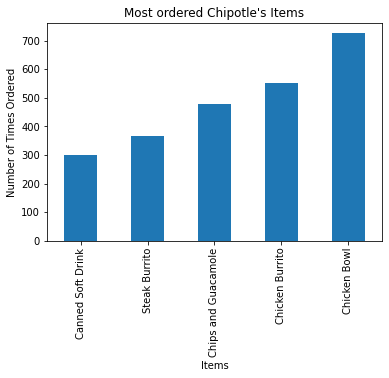

In [26]:
df = chipo['item_name'].value_counts().sort_values(ascending = True).tail(5)

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

In [27]:
chipo['item_name'].value_counts().sort_values(ascending = True).tail(5)

Canned Soft Drink      301
Steak Burrito          368
Chips and Guacamole    479
Chicken Burrito        553
Chicken Bowl           726
Name: item_name, dtype: int64

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [28]:
chipo.groupby('item_price').quantity.agg(['sum']).reset_index()

,item_price,sum
0,$1.09,106
1,$1.25,264
2,$1.50,117
3,$1.69,99
4,$1.99,1
...,...,...
73,$8.75,730
74,$8.90,40
75,$8.99,246
76,$9.25,398


In [31]:
data = chipo.groupby('item_price').quantity.agg(['sum']).reset_index()

In [32]:
ordered = data['item_price'].tolist()

In [33]:
price = data['sum'].tolist()

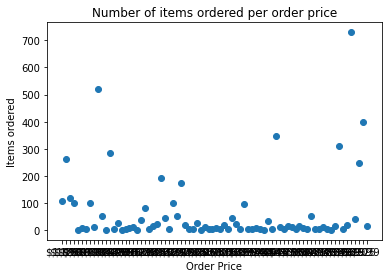

In [34]:
plt.scatter(ordered, price)
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.